In [ ]:
!pip install git+https://github.com/albertofernandezvillan/sauvola-net.git

In [14]:
from sauvolanet.dataUtils import collect_binarization_by_dataset, DataGenerator
from sauvolanet import layerUtils
from sauvolanet import testUtils
from sauvolanet.testUtils import prepare_inference, find_best_model
from sauvolanet import dataUtils

In [15]:
model = prepare_inference(dataUtils.get_model_path())

In [16]:
model.summary()

Model: "Sauvola_v3_att_w7.15.23.31.39.47.55.63_k1_R1_a1_inorm"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img01_inp (InputLayer)          [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 8 80          img01_inp[0][0]                  
__________________________________________________________________________________________________
inorm0 (InstanceNormalization)  (None, None, None, 8 0           conv0[0][0]                      
__________________________________________________________________________________________________
relu0 (Activation)              (None, None, None, 8 0           inorm0[0][0]                     
______________________________________________

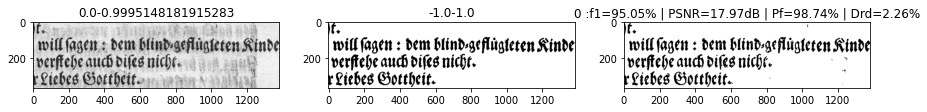

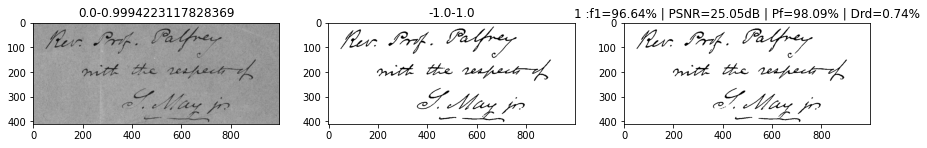

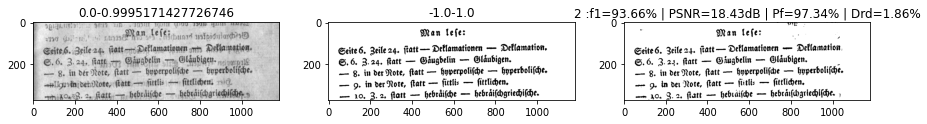

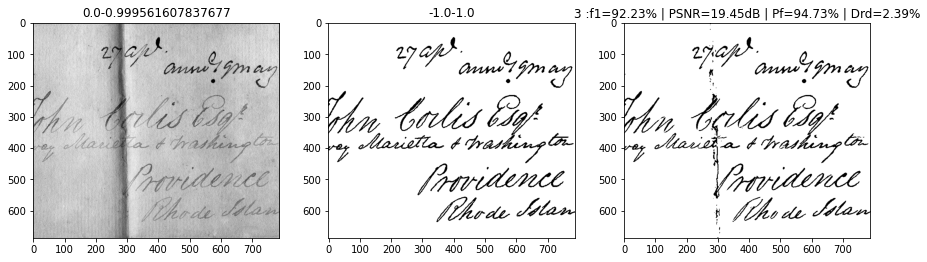

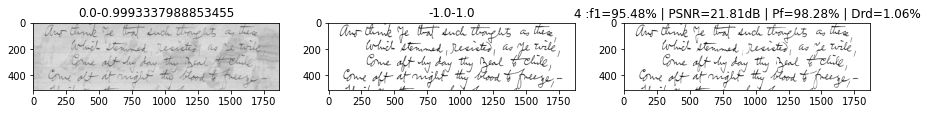

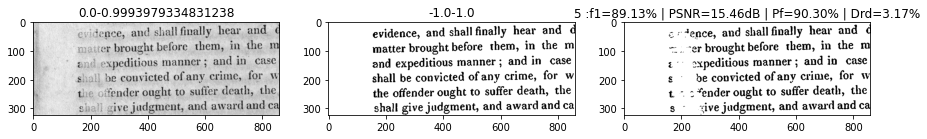

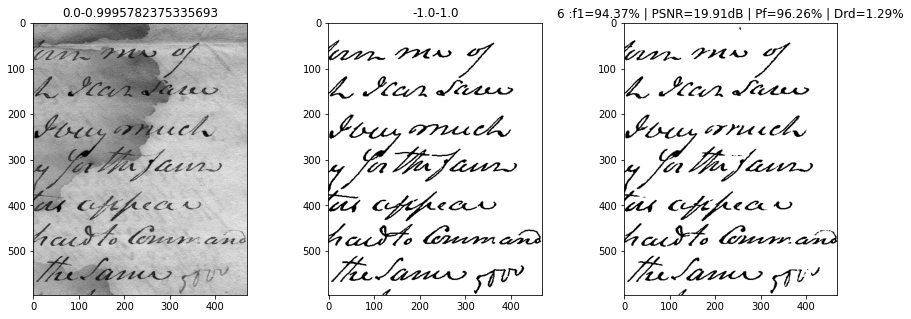

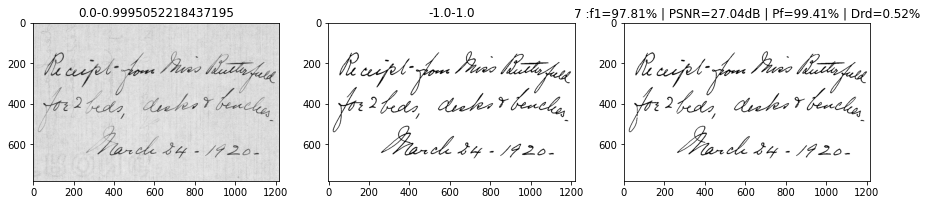

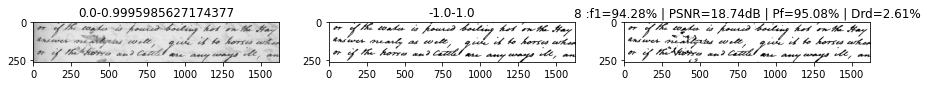

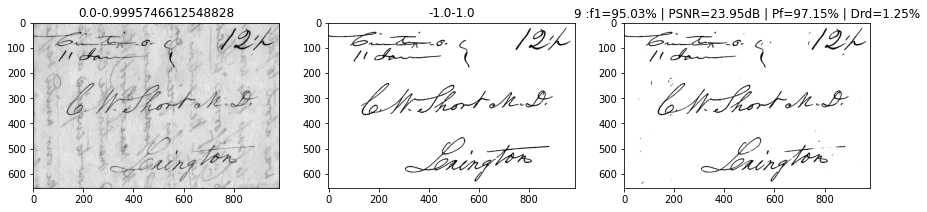

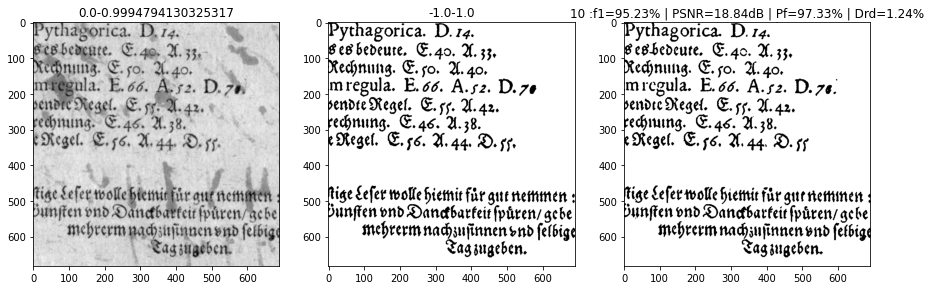

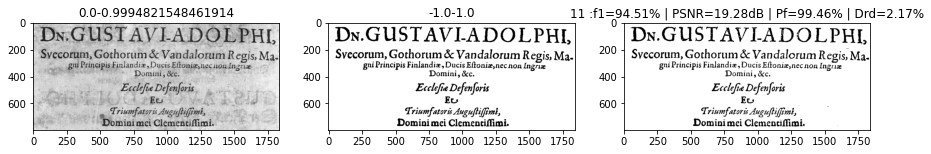

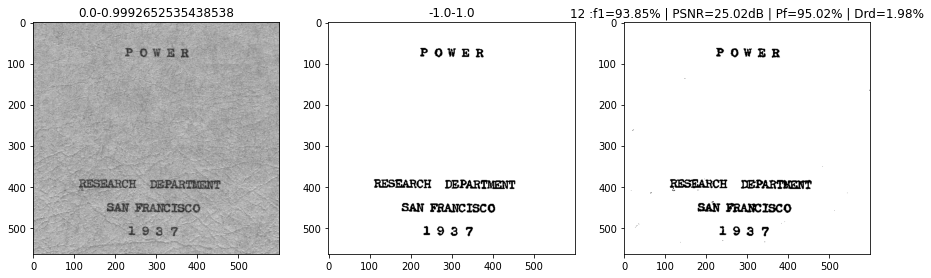

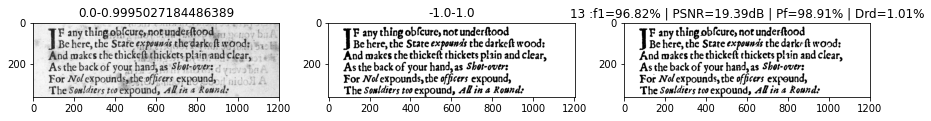

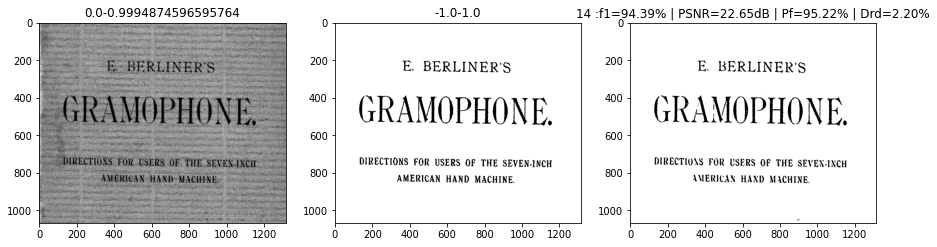

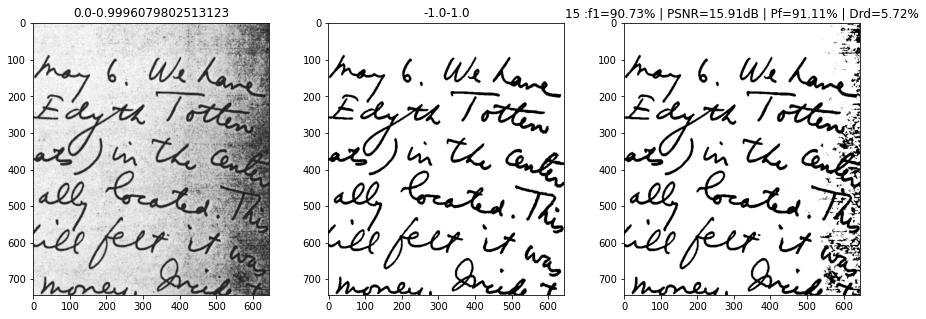

----------------------------------------------------------------------------------------------------
Total average : DIBCO2011 [ 0.94324942 20.55628111  0.96402432  1.96548453]


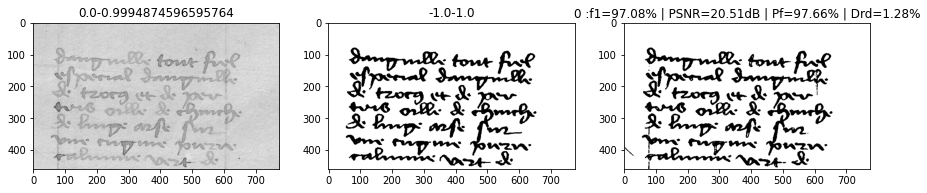

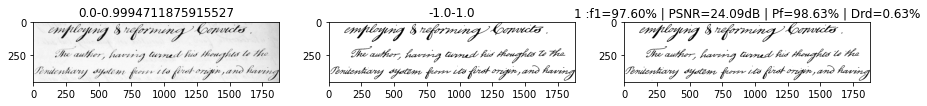

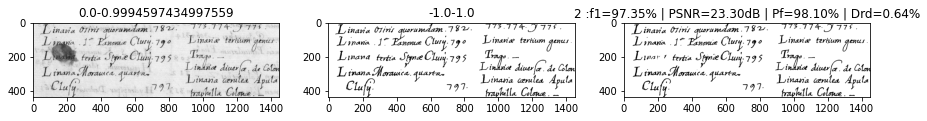

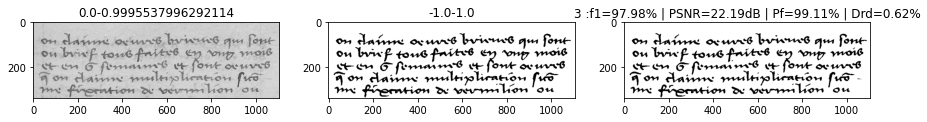

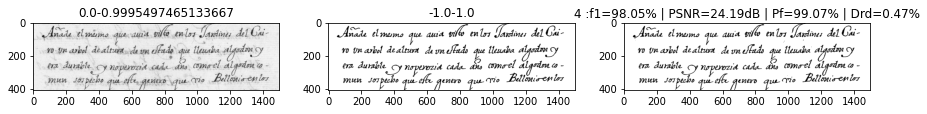

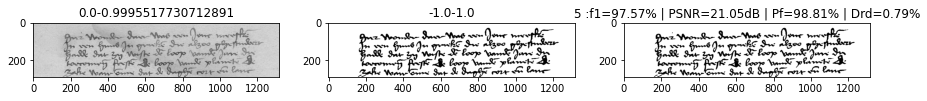

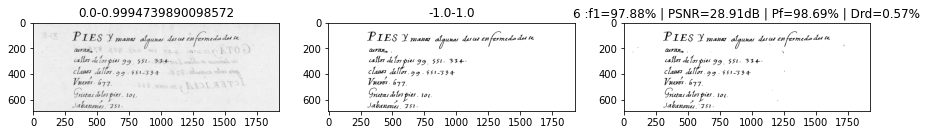

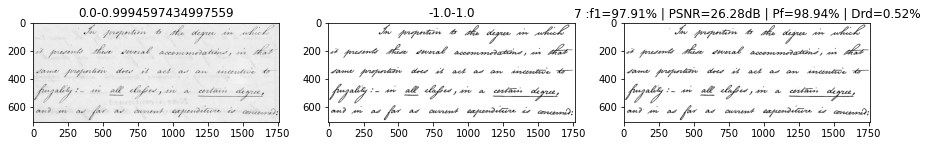

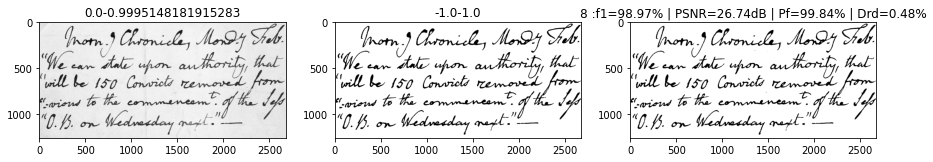

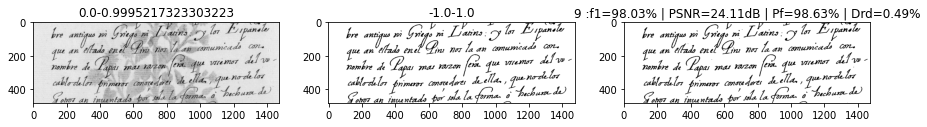

----------------------------------------------------------------------------------------------------
Total average : DIBCO2014 [ 0.97842514 24.13957581  0.98747579  0.64873461]


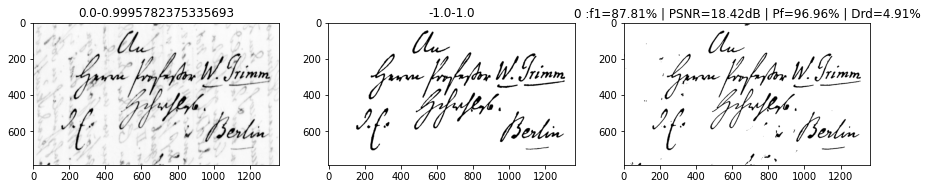

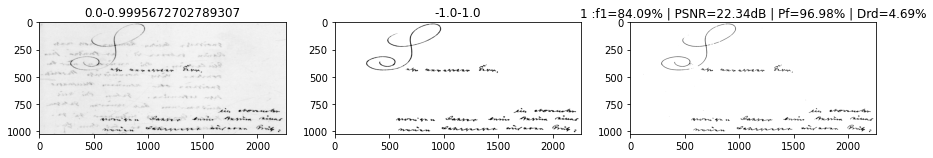

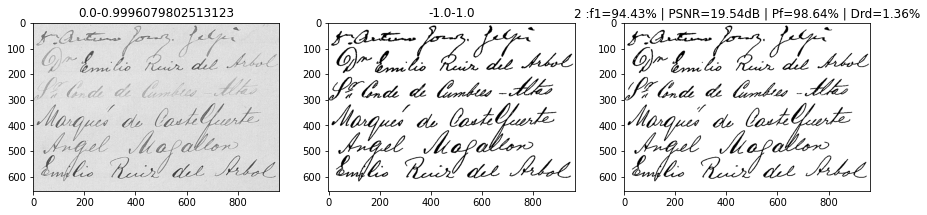

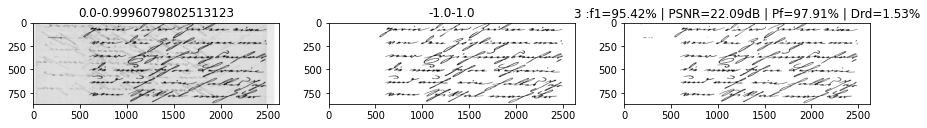

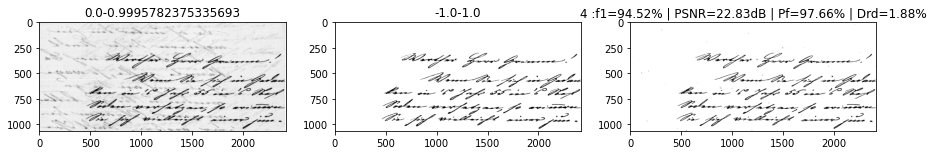

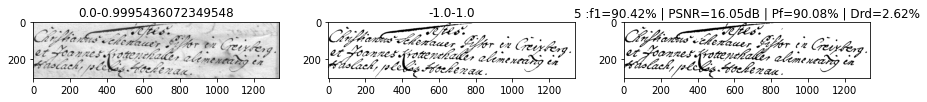

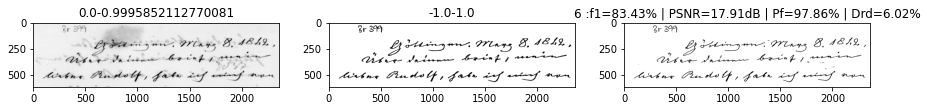

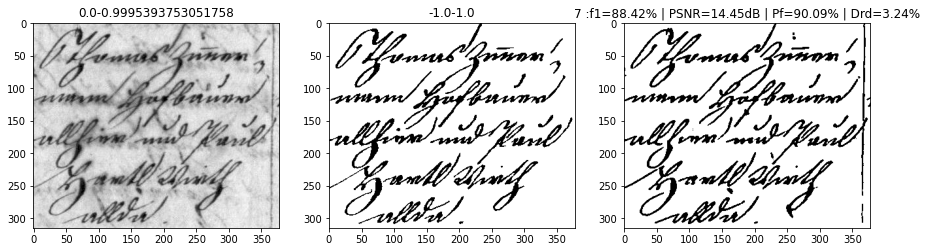

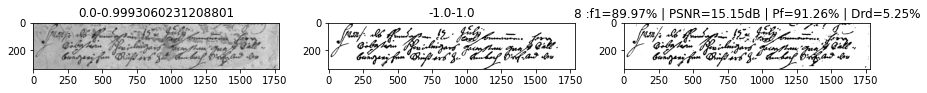

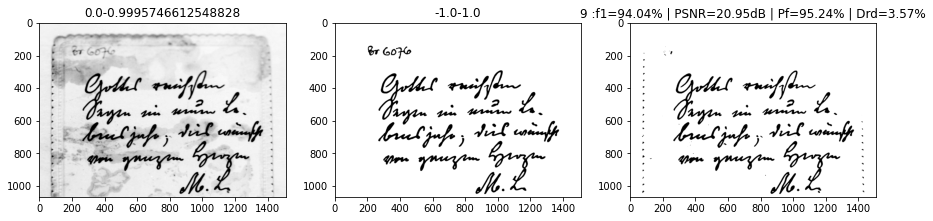

----------------------------------------------------------------------------------------------------
Total average : DIBCO2016 [ 0.90255003 18.97212987  0.95266104  3.5070626 ]


In [11]:
import numpy as np
from matplotlib import pyplot
from sauvolanet.metrics import Fmeasure, Psnr, Pfmeasure, DRD

dataset_lut = collect_binarization_by_dataset(dataUtils.get_dataset_path())
test_datasets = ["DIBCO2011","DIBCO2014","DIBCO2016"]

for this in test_datasets :
    all_metrics = []
    test_datagen = DataGenerator(dataset_lut[this], output_shape=None, mode='testing')
    L = len(test_datagen)
    for i in range(L) :
        x, y = test_datagen[i]
        z = model.predict(x)
        pyplot.figure(figsize=(15,5))
        pyplot.subplot(131)
        pyplot.imshow(x[0,...,0], cmap='gray')
        pyplot.title('{}-{}'.format(x.min(), x.max()))
        pyplot.subplot(132)
        pyplot.imshow(y[0,...,0], cmap='gray', vmin=-1, vmax=1)
        pyplot.title('{}-{}'.format(y.min(), y.max()))
        pyplot.subplot(133)
        pyplot.imshow(z[0,...,0]>0, cmap='gray', vmin=0, vmax=1)
        pyplot.title(f'predicted {z.min():.2f} - {z.max():.2f}')
        f1 = Fmeasure(z[0,...,0]>0,y[0,...,0]>0)
        psnr = Psnr(z[0,...,0]>0,y[0,...,0]>0)
        Pf = Pfmeasure(z[0,...,0]>0,y[0,...,0]>0)
        drd = DRD(z[0,...,0]>0,y[0,...,0]>0)
        all_metrics.append([f1, psnr, Pf, drd])
        pyplot.title(f'{i} :f1={f1*100:.2f}% | PSNR={psnr:.2f}dB | Pf={Pf*100:.2f}% | Drd={drd:.2f}%')
        pyplot.show()
    print('-' * 100)
    print("Total average : " +this+" "+ str(np.mean(all_metrics,axis=0)))
